# (Loan Data from Prosper)
## by (Ahmed Tarek)

## Investigation Overview

In this presentation I will attempt to answer some questions:
- What attributes affect the borrower's annual percentage rate?
> This question is helpful for borrowers to decide on taking loans.
- What attributes affect a loan’s outcome status?
> This is very critical for banks to minimize the risk and to set the right interest rate.
- insight on increasing Prosper profits from loans. 

## Dataset Overview

This data set contains 113,937 loans with 81 variables on each
loan, including loan amount, borrower rate (or interest rate),
current loan status, borrower income, and many others.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [2]:
df_loans = pd.read_csv('prosperLoanData.csv')
df_loans

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,...,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,...,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,...,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113932,E6D9357655724827169606C,753087,2013-04-14 05:55:02.663000000,NaN,36,Current,NaN,0.22354,0.1864,0.1764,...,-75.58,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
113933,E6DB353036033497292EE43,537216,2011-11-03 20:42:55.333000000,NaN,36,FinalPaymentInProgress,NaN,0.13220,0.1110,0.1010,...,-30.05,0.0,0.0,0.0,0.0,1.0,0,0,0.0,22
113934,E6E13596170052029692BB1,1069178,2013-12-13 05:49:12.703000000,NaN,60,Current,NaN,0.23984,0.2150,0.2050,...,-16.91,0.0,0.0,0.0,0.0,1.0,0,0,0.0,119
113935,E6EB3531504622671970D9E,539056,2011-11-14 13:18:26.597000000,NaN,60,Completed,2013-08-13 00:00:00,0.28408,0.2605,0.2505,...,-235.05,0.0,0.0,0.0,0.0,1.0,0,0,0.0,274


In [3]:
df_loans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   ListingKey                           113937 non-null  object 
 1   ListingNumber                        113937 non-null  int64  
 2   ListingCreationDate                  113937 non-null  object 
 3   CreditGrade                          28953 non-null   object 
 4   Term                                 113937 non-null  int64  
 5   LoanStatus                           113937 non-null  object 
 6   ClosedDate                           55089 non-null   object 
 7   BorrowerAPR                          113912 non-null  float64
 8   BorrowerRate                         113937 non-null  float64
 9   LenderYield                          113937 non-null  float64
 10  EstimatedEffectiveYield              84853 non-null   float64
 11  EstimatedLoss

In [4]:
df_loans.describe()

,ListingNumber,Term,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,ProsperRating (numeric),ProsperScore,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
count,1.139370e+05,113937.000000,113912.000000,113937.000000,113937.000000,84853.000000,84853.000000,84853.000000,84853.000000,84853.000000,...,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000
mean,6.278857e+05,40.830248,0.218828,0.192764,0.182701,0.168661,0.080306,0.096068,4.072243,5.950067,...,-54.725641,-14.242698,700.446342,681.420499,25.142686,0.998584,0.048027,0.023460,16.550751,80.475228
std,3.280762e+05,10.436212,0.080364,0.074818,0.074516,0.068467,0.046764,0.030403,1.673227,2.376501,...,60.675425,109.232758,2388.513831,2357.167068,275.657937,0.017919,0.332353,0.232412,294.545422,103.239020
min,4.000000e+00,12.000000,0.006530,0.000000,-0.010000,-0.182700,0.004900,-0.182700,1.000000,1.000000,...,-664.870000,-9274.750000,-94.200000,-954.550000,0.000000,0.700000,0.000000,0.000000,0.000000,1.000000
25%,4.009190e+05,36.000000,0.156290,0.134000,0.124200,0.115670,0.042400,0.074080,3.000000,4.000000,...,-73.180000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,2.000000
50%,6.005540e+05,36.000000,0.209760,0.184000,0.173000,0.161500,0.072400,0.091700,4.000000,6.000000,...,-34.440000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,44.000000
75%,8.926340e+05,36.000000,0.283810,0.250000,0.240000,0.224300,0.112000,0.116600,5.000000,8.000000,...,-13.920000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,115.000000
max,1.255725e+06,60.000000,0.512290,0.497500,0.492500,0.319900,0.366000,0.283700,7.000000,11.000000,...,32.060000,0.000000,25000.000000,25000.000000,21117.900000,1.012500,39.000000,33.000000,25000.000000,1189.000000


## Univariate Exploration

### Lets take a look at the BorrowerAPR
It appears that this distribution is multimodal with several peaks. A peak at 0.08, 0.2, 0.3, and an exceptionally high peak at 0.36.

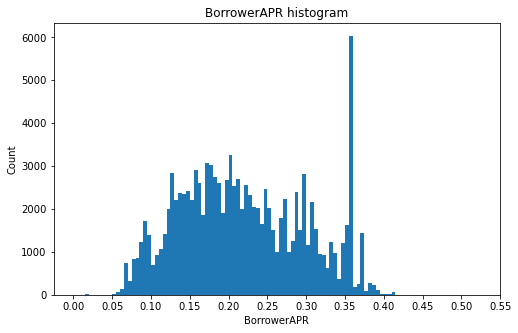

In [5]:
bins = np.arange(0, df_loans.BorrowerAPR.max(), 0.005)
plt.figure(figsize=[8, 5])
plt.hist(data = df_loans, x = 'BorrowerAPR', bins = bins)
plt.xticks(np.arange(0, df_loans.BorrowerAPR.max()+0.05, 0.05))
plt.xlabel('BorrowerAPR')
plt.ylabel('Count')
plt.title('BorrowerAPR histogram');

### Let's look at Prosper Score which is a custom risk score built using historical Prosper data.
Most of the borrower got low Prosper Score of 4 that means they are risky to loan. Notice that even customers with a low risks score of 1 or 2 did get a loan. Not many borrowers received the highest score of 10.

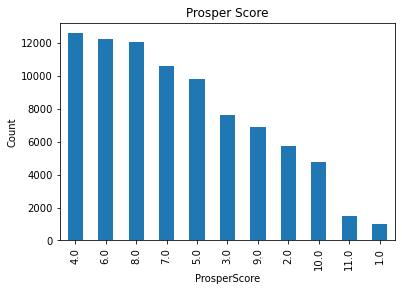

In [6]:
df_loans.ProsperScore.value_counts().plot(kind='bar')
plt.xlabel('ProsperScore')
plt.ylabel('Count')
plt.title('Prosper Score');

This shows that there are scores above 10 which is not possible since the score is from 1-10. This data must be removed.

In [7]:
df_loans = df_loans[df_loans.ProsperScore != 11]

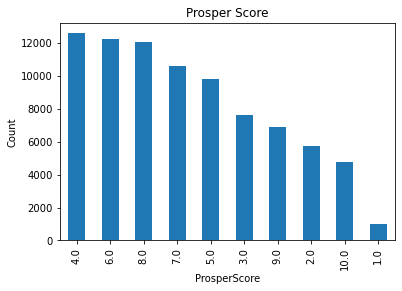

In [8]:
df_loans.ProsperScore.value_counts().plot(kind='bar')
plt.xlabel('ProsperScore')
plt.ylabel('Count')
plt.title('Prosper Score');

### Now lets look at ProsperRating (Alpha) and Occupation
It appears that most borrowers were rated from C to A, and students are the least to take loans.

Before plotting, the ProsperRating (Alpha) should be ordered from low to high so there won't be any misleading visualization about the rating order

In [9]:
rate_order = ['HR','E','D','C','B','A','AA']
ordered_var = pd.api.types.CategoricalDtype(ordered = True, categories = rate_order)
df_loans['ProsperRating (Alpha)'] = df_loans['ProsperRating (Alpha)'].astype(ordered_var)

<ipython-input-9-983a76435ecb>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_loans['ProsperRating (Alpha)'] = df_loans['ProsperRating (Alpha)'].astype(ordered_var)


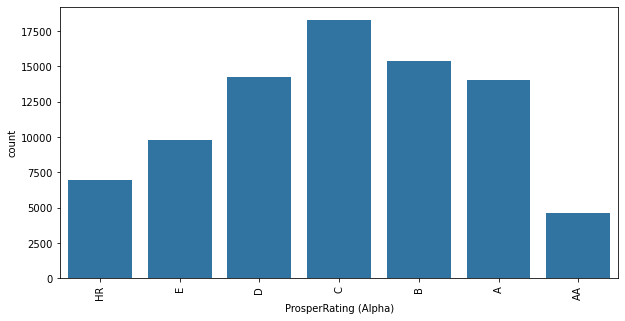

In [41]:
fig = plt.subplots(figsize = [10, 5])

default_color = sb.color_palette()[0]
sb.countplot(data = df_loans, x = 'ProsperRating (Alpha)', color = default_color)
plt.xticks(rotation=90);

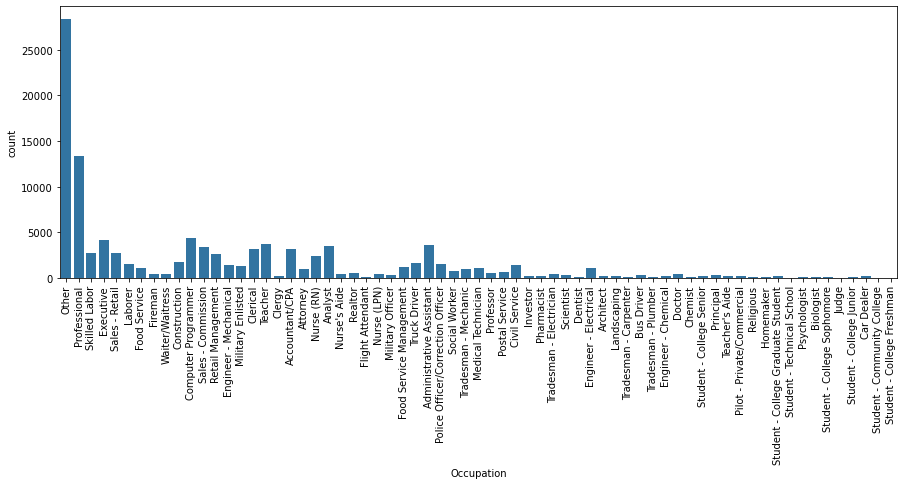

In [42]:
fig = plt.subplots(figsize = [15, 5])

default_color = sb.color_palette()[0]
sb.countplot(data = df_loans, x = 'Occupation', color = default_color)
plt.xticks(rotation=90);

### Now, let's compare the Prosper rating (Alpha) mean with the Borrower APR mean
Notice that the highest rating of AA received the lowest BorrowerAPR (5.61), while the lowerest rating of HR received the highest BorrowerAPR (22.17). This shows that borrowers with higher ratings received lower BorrowerAPR.

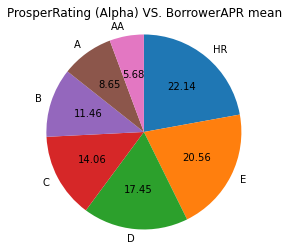

In [12]:
ProsperRatingAlpha_mean = df_loans.groupby('ProsperRating (Alpha)').BorrowerAPR.mean()

plt.pie(ProsperRatingAlpha_mean, labels = ProsperRatingAlpha_mean.index, startangle = 90, counterclock = False, autopct='%1.2f')
plt.axis('square') 
plt.title('ProsperRating (Alpha) VS. BorrowerAPR mean');

### I am interested in knowing more about the LoanOriginalAmount
The histogram has serval peaks at around 4,000, 10,000, and 15,000. But most of the values are in the lower end between 2500 and 10,000. The most loaned amounts are 4,000 and 15,000. The mean loan amount is between 8200.

In [13]:
df_loans.LoanOriginalAmount.mean()

8252.601132635735

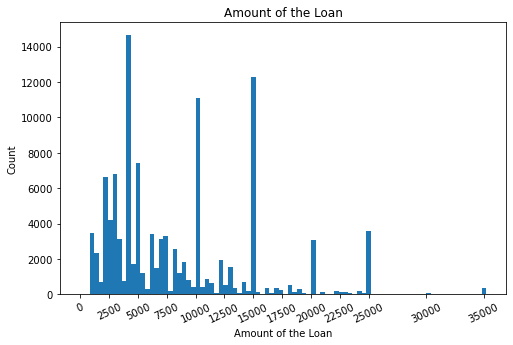

In [14]:
binsize = 400
bins = np.arange(0, df_loans.LoanOriginalAmount.max()+binsize, binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = df_loans, x = 'LoanOriginalAmount', bins = bins)
plt.xlabel('Amount of the Loan')
plt.ylabel('Count')
plt.title('Amount of the Loan')
plt.xticks([0,2500,5000,7500,10000,12500,15000,17500,20000,22500,25000,30000,35000], rotation=25);

### Now lets see if there is a relation between the LoanOriginalAmount and Term
The histogram has serval peaks at around 4,000, 10,000, and 15,000. But most of the values are in the lower end between 2500 and 10,000. The most loaned amounts are 4,000 and 15,000.

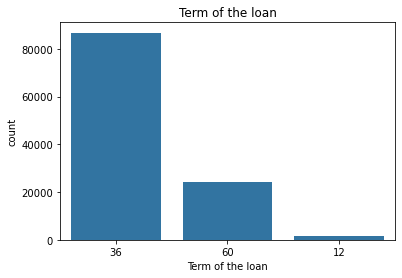

In [15]:
base_color = sb.color_palette()[0]
sb.countplot(data = df_loans, x='Term', color = base_color, order = df_loans.Term.value_counts().index)
plt.xlabel('Term of the loan')
plt.title('Term of the loan');

#### Lets look at the CreditScoreRangeLower and CreditScoreRangeUpper
The two histograms show similar trends, and there are no outliers that fall out of the range.

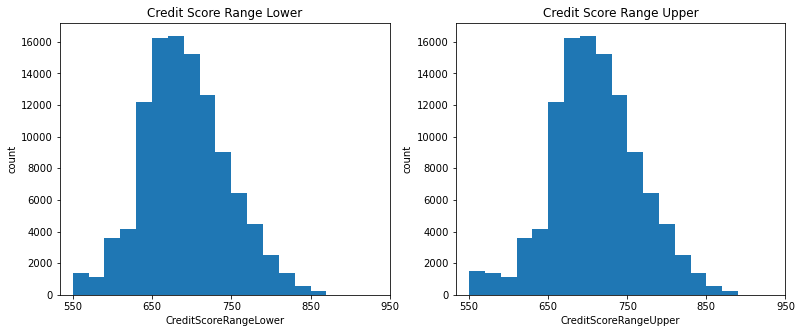

In [16]:
plt.figure(figsize = [13, 5]) 


plt.subplot(1, 2, 1)
bins = np.arange(550, df_loans.CreditScoreRangeLower.max(), 20)
plt.hist(data = df_loans, x = 'CreditScoreRangeLower', bins = bins)
plt.xticks(np.arange(550, 1000, 100))
plt.title('Credit Score Range Lower')
plt.xlabel('CreditScoreRangeLower')
plt.ylabel('count');

plt.subplot(1, 2, 2)
bins = np.arange(550, df_loans.CreditScoreRangeUpper.max(), 20)
plt.hist(data = df_loans, x = 'CreditScoreRangeUpper', bins = bins)
plt.xticks(np.arange(550, 1000, 100))
plt.title('Credit Score Range Upper')
plt.xlabel('CreditScoreRangeUpper')
plt.ylabel('count');

### Now lets take a look at the loan status
Most of the loans are current or completed.

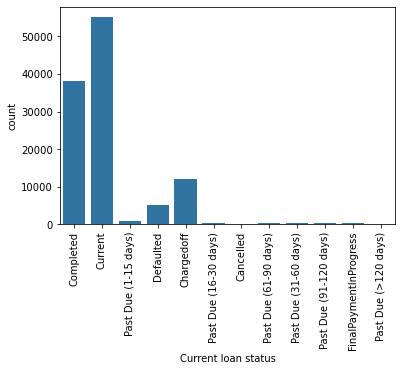

In [17]:
base_color = sb.color_palette()[0]
sb.countplot(data = df_loans, x = 'LoanStatus', color = base_color)
plt.xlabel('Current loan status')
plt.xticks(rotation = 90);

Combining the past dues into one column since it is not important to show that much information

In [18]:
df_loans.LoanStatus = df_loans.LoanStatus.replace(['Past Due (1-15 days)', 'Past Due (31-60 days)','Past Due (61-90 days)',
                                                   'Past Due (91-120 days)','Past Due (16-30 days)',
                                                   'Past Due (>120 days)'],'Past Due')

df_loans.LoanStatus.value_counts()

C:\Users\Ahmed\anaconda3\lib\site-packages\pandas\core\generic.py:5168: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


Current                   55157
Completed                 38043
Chargedoff                11992
Defaulted                  5017
Past Due                   2065
FinalPaymentInProgress      202
Cancelled                     5
Name: LoanStatus, dtype: int64

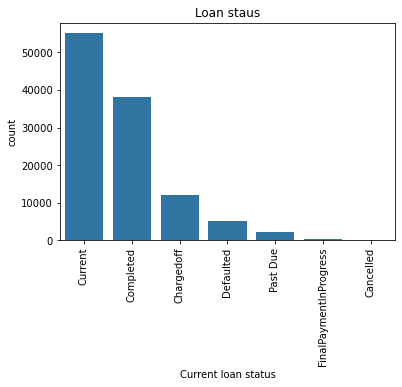

In [19]:
base_color = sb.color_palette()[0]
sb.countplot(data = df_loans, x = 'LoanStatus', color = base_color, order = df_loans.LoanStatus.value_counts().index)
plt.xlabel('Current loan status')
plt.xticks(rotation = 90)
plt.title('Loan staus');

### Now lets look at the TotalProsperPaymentsBilled (Number of on time payments)
The distribution of the number of on-time payments has two peaks 9 and 35. Notice that the distribution is right-skewed with most of the values on the lower end and fewer values on the higher end. This would make the distribution multimodal. It seems like that most of the borrowers had missed paying some of the monthly payments on time.

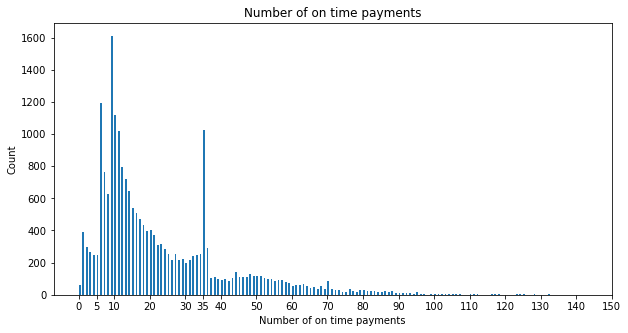

In [20]:
binsize = 0.5
bins = np.arange(df_loans.TotalProsperPaymentsBilled.min(), df_loans.TotalProsperPaymentsBilled.max()+binsize, binsize)

plt.figure(figsize=[10, 5])
plt.hist(data = df_loans, x = 'TotalProsperPaymentsBilled', bins = bins)
plt.xlabel('Number of on time payments')
plt.ylabel('Count')
plt.title('Number of on time payments')
plt.xticks([0,5,10,20,30,35,40,50,60,70,80,90,100,110,120,130,140,150])
plt.show()

### Now the IncomeRange
The income range of the borrowers shows that most of the loans were given to customers with an income between 25,000 and 74,999. Notice that people that are not employed, or have an income of 0 received a loan as well. They might be other criteria than the income that qualifies one to get a loan like being a student.

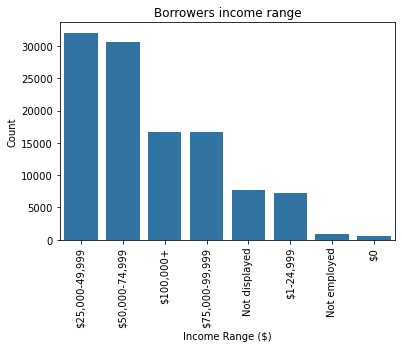

In [21]:
sb.countplot(data= df_loans, x= 'IncomeRange', color= base_color, order = df_loans.IncomeRange.value_counts().index)
plt.xticks(rotation=90)
plt.xlabel('Income Range ($)')
plt.ylabel('Count')
plt.title('Borrowers income range');

### Lets check the EmploymentStatus to find out
Of course, most of the borrowers are employed, but the data shows that retired persons got a loan too.

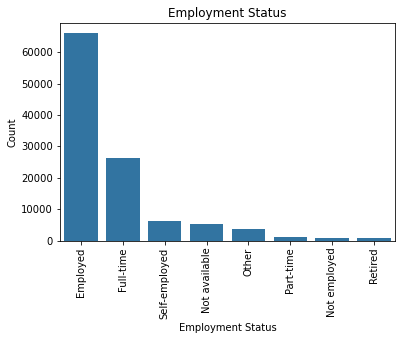

In [22]:
sb.countplot(data= df_loans, x= 'EmploymentStatus', color= base_color, order = df_loans['EmploymentStatus'].value_counts().index)
plt.xticks(rotation=90)
plt.xlabel('Employment Status')
plt.ylabel('Count')
plt.title('Employment Status');

## Bivariate Exploration

### Lets look at the numeric variables
There are no strong positive relationships between any pairs. BorrowerAPR and ProsperScore are negative because borrowers with a lower score are more likely to pay higher APR. CreditScore and BorrowerAPR are also negative because the higher the borrowers CreditScore the more trustworthy they are, therefore they received lower APR.

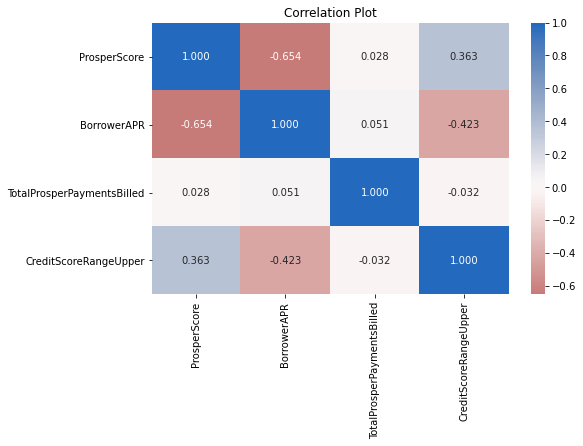

In [23]:
num_var = ['ProsperScore', 'BorrowerAPR', 'TotalProsperPaymentsBilled', 'CreditScoreRangeUpper']

plt.figure(figsize = [8, 5])
sb.heatmap(df_loans[num_var].corr(), annot = True, fmt = '.3f', cmap = 'vlag_r', center = 0)
plt.title('Correlation Plot');

### Lets look more closely at ProsperScore vs BorrowerAPR 
This also proves that people with higher ratings tend to be more trustworthy and therefore given lower BorrowerAPR.

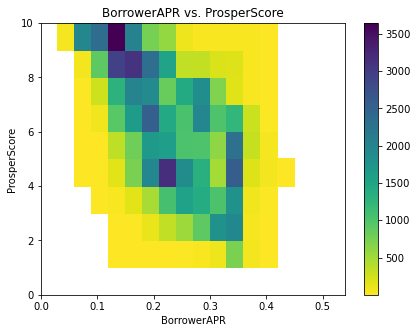

In [24]:
plt.figure(figsize = [15, 5]) 

plt.subplot(1, 2, 2)
bins_x = np.arange(0, df_loans.BorrowerAPR.max()+0.05, 0.03)
bins_y = np.arange(0, df_loans.ProsperScore.max()+1, 1)
plt.hist2d(data = df_loans, x = 'BorrowerAPR', y = 'ProsperScore', bins = [bins_x, bins_y], cmap = 'viridis_r', cmin = 0.5)
plt.colorbar()
plt.title('BorrowerAPR vs. ProsperScore')
plt.xlabel('BorrowerAPR')
plt.ylabel('ProsperScore');

### Now  BorrowerAPR vs. CreditScoreRangeUpper
We can see the trend that the higher the CreditScore the lower the APR.

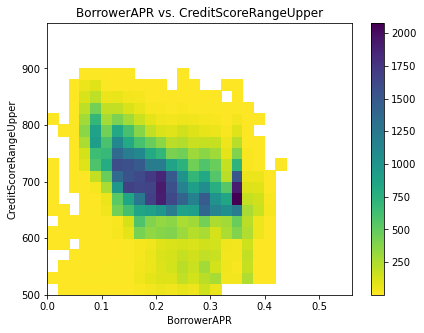

In [25]:
plt.figure(figsize = [15, 5]) 

plt.subplot(1, 2, 2)
bins_x = np.arange(0, df_loans.BorrowerAPR.max()+0.05, 0.02)
bins_y = np.arange(500, df_loans.CreditScoreRangeUpper.max()+100, 20)
plt.hist2d(data = df_loans, x = 'BorrowerAPR', y = 'CreditScoreRangeUpper', bins = [bins_x, bins_y], cmap = 'viridis_r', cmin = 0.5)
plt.colorbar()
plt.title('BorrowerAPR vs. CreditScoreRangeUpper')
plt.xlabel('BorrowerAPR')
plt.ylabel('CreditScoreRangeUpper');

###  let's look at relationships between the categorical features.
We can see that there is an interaction between term and Prosper rating. The most popular term was 36 and most of the employed especially with full-time jobs took that kind of loan. And of course, the higher proper ratings were given to the employed personnel.

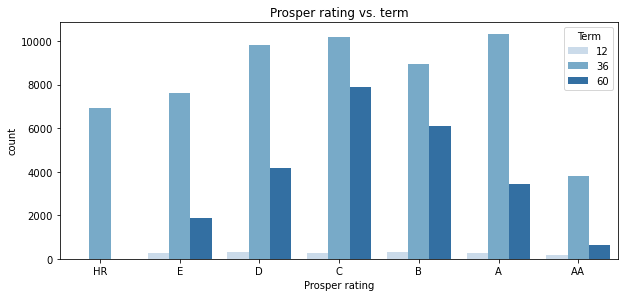

In [26]:
plt.figure(figsize = [10, 20])

# Prosper rating vs. term
plt.subplot(4, 1, 1)
sb.countplot(data = df_loans, x = 'ProsperRating (Alpha)', hue = 'Term', palette = 'Blues')
plt.xlabel('Prosper rating')
plt.title('Prosper rating vs. term');

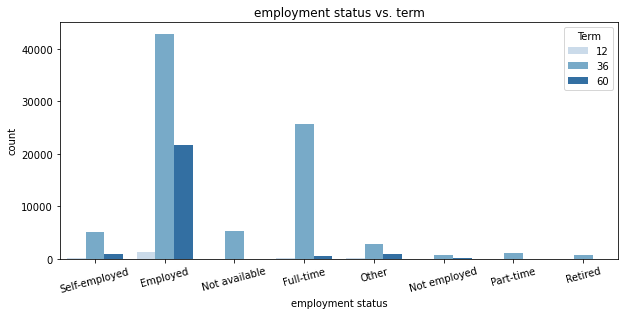

In [27]:
# employment status vs. term
plt.figure(figsize = [10, 20])

ax = plt.subplot(4, 1, 2)
sb.countplot(data = df_loans, x = 'EmploymentStatus', hue = 'Term', palette = 'Blues')
plt.xticks(rotation = 15)
plt.xlabel('employment status')
plt.title('employment status vs. term');

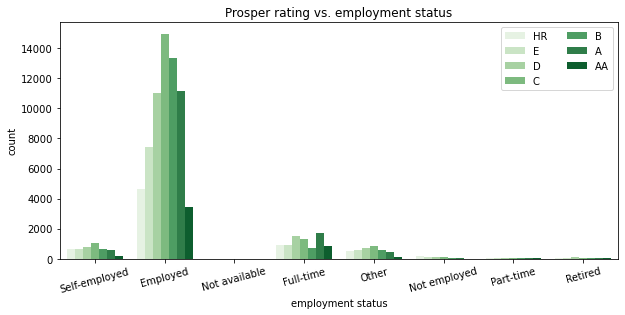

In [28]:
# Prosper rating vs. employment status
plt.figure(figsize = [10, 20])
ax = plt.subplot(4, 1, 3)
sb.countplot(data = df_loans, x = 'EmploymentStatus', hue = 'ProsperRating (Alpha)', palette = 'Greens')
ax.legend(loc = 1, ncol = 2)
plt.xticks(rotation = 15)
plt.xlabel('employment status')
plt.title('Prosper rating vs. employment status');

### Lets see how borrower APR and loan original amount are related
This relation shows that the range of APR decreases with the increase in the loan amount. Overall, the borrower's APR is negatively correlated with the loan amount.

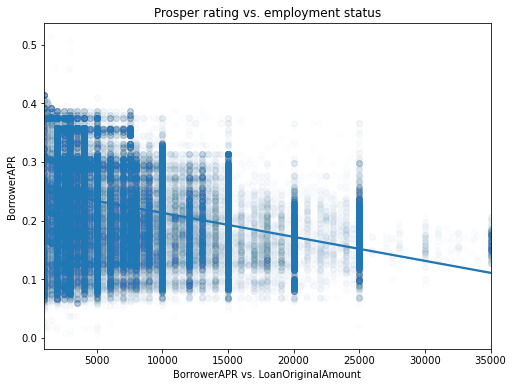

In [29]:
plt.figure(figsize = [8, 6])
sb.regplot(data = df_loans, x = 'LoanOriginalAmount', y = 'BorrowerAPR', scatter_kws={'alpha':0.01})
plt.xlabel('BorrowerAPR vs. LoanOriginalAmount')
plt.title('Prosper rating vs. employment status');

### Now the relation between LoanStatus and LoanOriginalAmount
The original loan amount is about the same on average for loans that are completed, charged-off, or defaulted. However, loans with past due payments have on average a higher original loan amount.

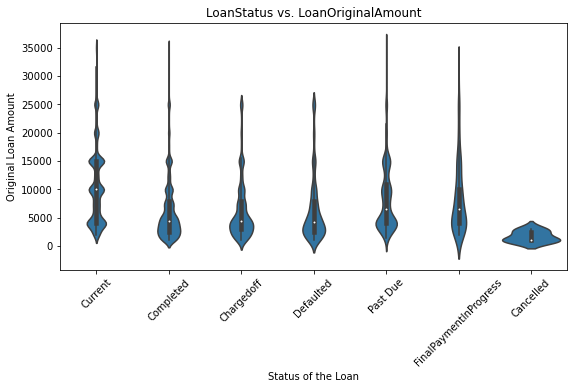

In [30]:
plt.figure(figsize = [20, 10])

plt.subplot(2, 2, 2)
sb.violinplot(data = df_loans, x = 'LoanStatus', y = 'LoanOriginalAmount', color = base_color, order = df_loans.LoanStatus.value_counts().index)
plt.xticks(rotation=45)
plt.xlabel('Status of the Loan')
plt.ylabel('Original Loan Amount')
plt.title('LoanStatus vs. LoanOriginalAmount');

### Now the relation between loan status and loan total prosper payments billed
Complete loans have on average the highest number of on time payments while loans with the status charged-off and defaulted have the lowest.

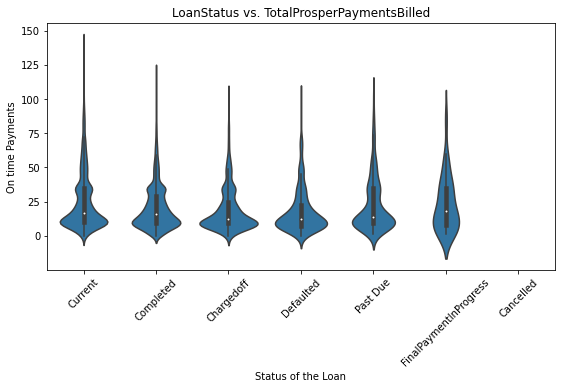

In [31]:
plt.figure(figsize = [20, 10])

plt.subplot(2, 2, 2)
sb.violinplot(data = df_loans, x = 'LoanStatus', y = 'TotalProsperPaymentsBilled', color = base_color, order = df_loans.LoanStatus.value_counts().index)
plt.xticks(rotation=45)
plt.xlabel('Status of the Loan')
plt.ylabel('On time Payments')
plt.title('LoanStatus vs. TotalProsperPaymentsBilled');

### Relation between loan status and term
No matter what status a loan has, the most common length is 36 months and the least common is 60 months.

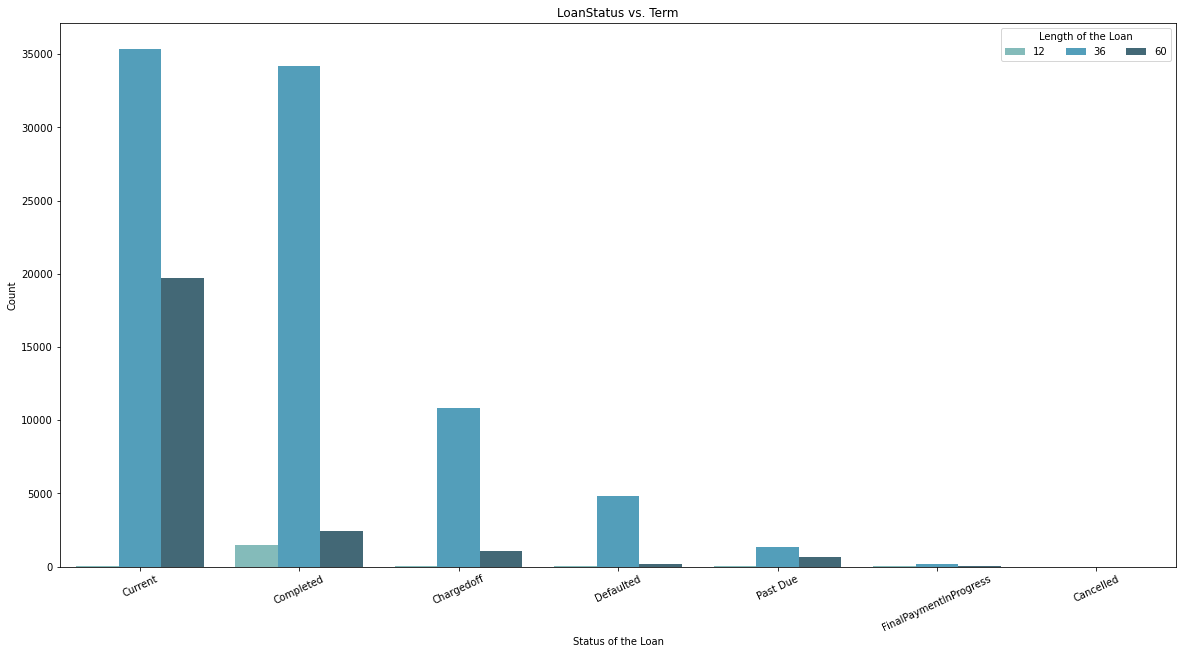

In [32]:
plt.figure(figsize = [20,10])

ax = sb.countplot(data = df_loans, x = 'LoanStatus', hue = 'Term', palette = "GnBu_d", order = df_loans.LoanStatus.value_counts().index)
plt.legend(loc = 1, ncol = 3, title = 'Length of the Loan')
plt.xticks(rotation = 25)
plt.xlabel('Status of the Loan')
ax.set_ylabel('Count')
plt.title('LoanStatus vs. Term');

### Relation between loan status and employment status
The status of the employment of the borrower seems not to have an impact on the outcome of the loan. but again the ones who take loans mostly are employed as also the ones who completed their loans are the full-time employed.

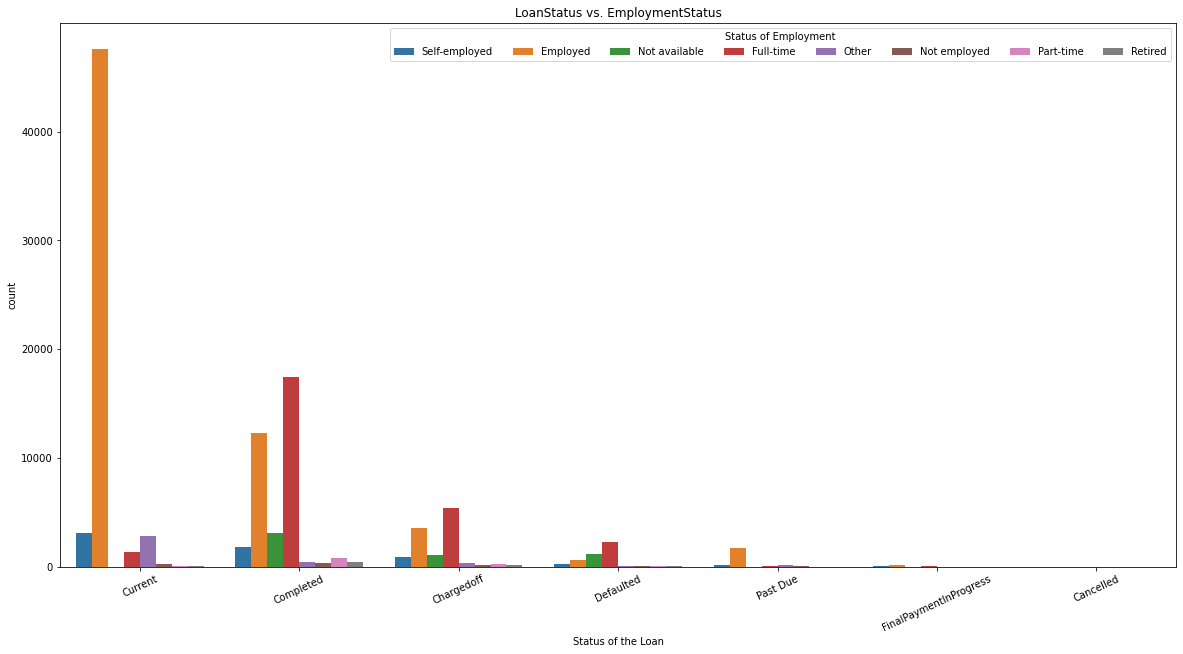

In [33]:
plt.figure(figsize = [20,10])

sb.countplot(data = df_loans, x = 'LoanStatus', hue = 'EmploymentStatus', order = df_loans.LoanStatus.value_counts().index)
plt.legend(loc = 1, ncol = 8, title = 'Status of Employment')
plt.xticks(rotation = 25)
plt.xlabel('Status of the Loan')
plt.title('LoanStatus vs. EmploymentStatus');

### Relation between loan status and income range
The borrowers who have an Income Range of (25000 - 74999) seem to be the ones who get more loans and pay them on time.

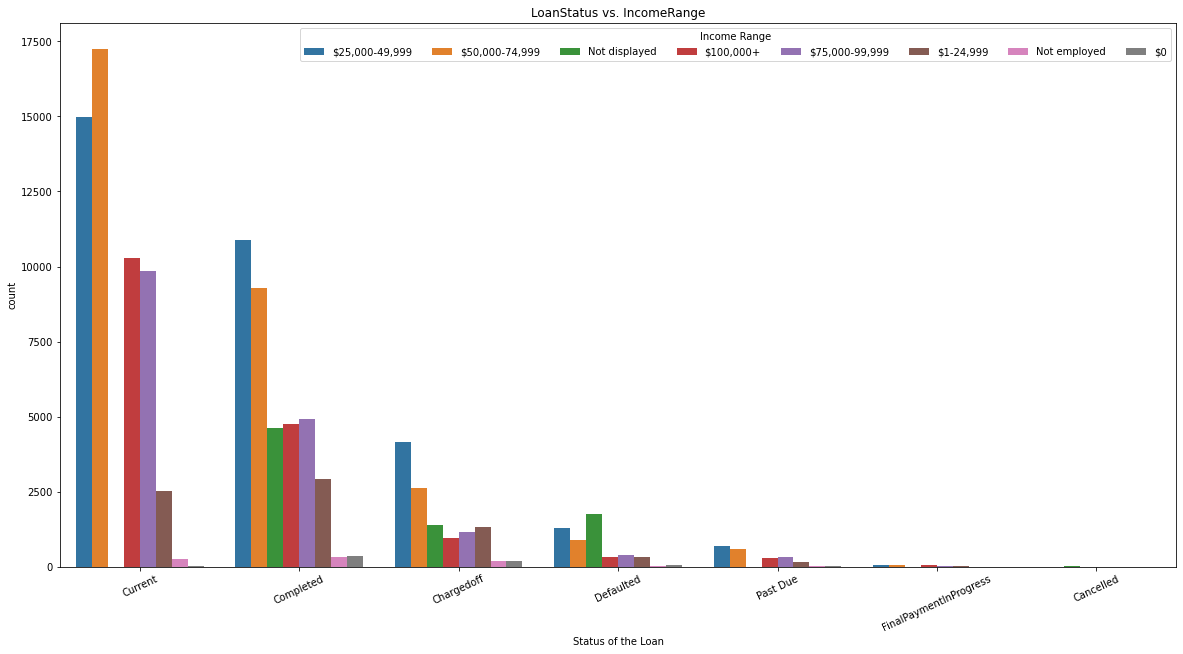

In [34]:
plt.figure(figsize = [20,10])

sb.countplot(data = df_loans, x = 'LoanStatus', hue = 'IncomeRange', order = df_loans.LoanStatus.value_counts().index)
plt.legend(loc = 1, ncol = 8, title = 'Income Range')
plt.xticks(rotation = 25)
plt.xlabel('Status of the Loan')
plt.title('LoanStatus vs. IncomeRange');

### Relation between prosper score and loan status 
The Prosper Score seems to affect the outcome of the loan. So the highest number of borrowers with completed loans has a prosper score of 8, while the highest number of borrowers with defaulted and charged-off loans have a prosper score of 6. Notice that the most common prosper score for borrowers with loans that are past due payments is 4.

In [35]:
# first I need to reshape the data 
reshape = df_loans.groupby(['LoanStatus', 'ProsperScore']).size()
reshape = reshape.reset_index(name = 'count')
reshape = reshape.pivot(index = 'ProsperScore', columns = 'LoanStatus', values = 'count')
reshape

LoanStatus,Chargedoff,Completed,Current,Defaulted,FinalPaymentInProgress,Past Due
ProsperScore,,,,,,
1.0,235,341,337,37,2,40
2.0,377,848,4196,70,23,252
3.0,414,1077,5804,75,20,252
4.0,784,1828,9476,119,28,360
5.0,907,2212,6222,165,25,282
6.0,925,2847,7981,173,25,327
7.0,662,2357,7210,135,16,217
8.0,666,3711,7265,139,39,233
9.0,309,2836,3612,71,13,70


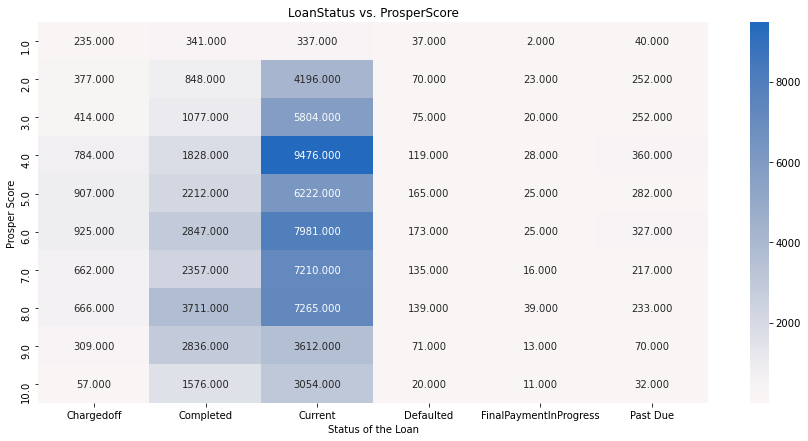

In [36]:
plt.figure(figsize = [15,7])

sb.heatmap(reshape, annot = True, fmt = '.3f', cmap = 'vlag_r', center = 0)
plt.xlabel('Status of the Loan')
plt.ylabel('Prosper Score')
plt.title('LoanStatus vs. ProsperScore');

## Multivariate Exploration


### Prosper rating effect on relationship between borrower APR and loan original amount
The loan amount increases with a better rating, the borrower's APR decreases with a better rating. The relationship between borrower APR and loan amount raises from negative to slightly positive when the prosper ratings are increased from HR to A or better. Maybe because people with A or AA ratings tend to borrow more money, and pay on time.

C:\Users\Ahmed\anaconda3\lib\site-packages\seaborn\axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


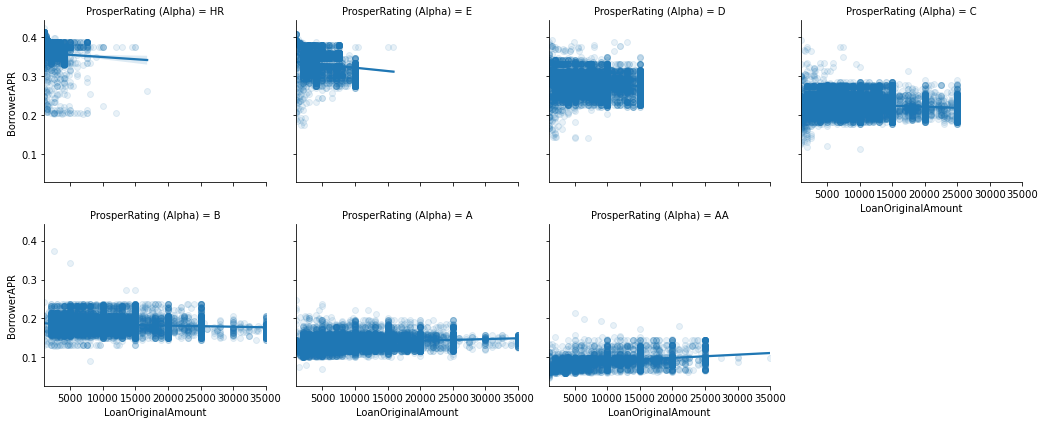

In [37]:
g=sb.FacetGrid(data = df_loans, aspect = 1.2, height = 5, col = 'ProsperRating (Alpha)', col_wrap = 4 , size = 3)
g.map(sb.regplot, 'LoanOriginalAmount', 'BorrowerAPR', x_jitter=0.04, scatter_kws={'alpha':0.1});
g.add_legend();

### BorrowerAPR considering rating and term
Notice that for prosper rating from HR to D the borrower APR increases with the decrease of borrow term, then it starts to shift from C to AA rating.

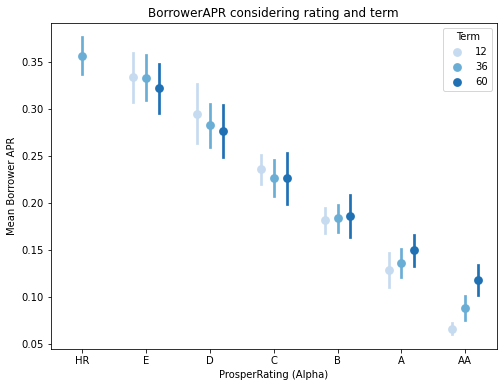

In [38]:
fig = plt.figure(figsize = [8,6])

ax = sb.pointplot(data = df_loans, x = 'ProsperRating (Alpha)', y = 'BorrowerAPR', hue = 'Term', palette = 'Blues', linestyles = '', dodge = 0.4, ci='sd')
plt.title('BorrowerAPR considering rating and term')
plt.ylabel('Mean Borrower APR')
ax.set_yticklabels([],minor = True);

### The rating and term effects on loan original amount 
Notice that with a better prosper rating, the loan amount of all three terms increases.

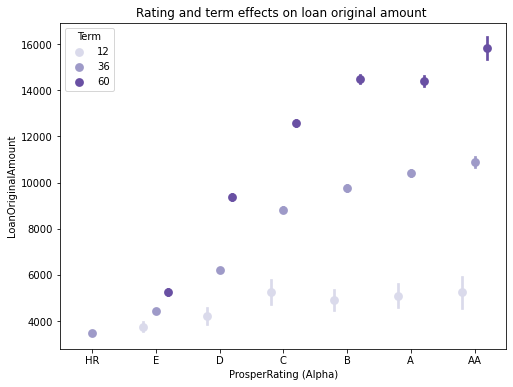

In [39]:
fig, ax = plt.subplots(figsize=[8,6])

sb.pointplot(data = df_loans, x = 'ProsperRating (Alpha)', y = 'LoanOriginalAmount', hue = 'Term', palette = 'Purples', linestyles = '', dodge = 0.4)
plt.title('Rating and term effects on loan original amount ');

### BorrowerAPR considering CreditScoreRangeUpper and ProsperScore
Notice that CreditScoreRangeUpper increase as BorrowerAPR decrease in the plots, this proves that CreditScoreRangeUpper and ProsperScore negatively correlated to BorrowerAPR.

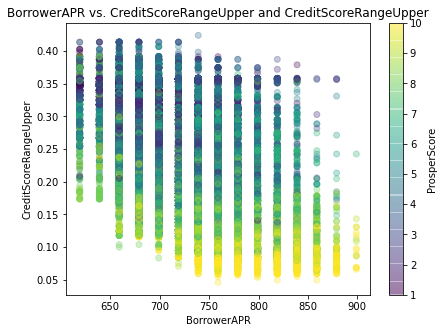

In [40]:
plt.figure(figsize = [15, 5])

plt.subplot(1, 2, 2)
plt.scatter(data = df_loans, x = 'CreditScoreRangeUpper', y = 'BorrowerAPR', c ='ProsperScore', alpha = 0.3)
plt.colorbar(label = 'ProsperScore')
plt.title('BorrowerAPR vs. CreditScoreRangeUpper and CreditScoreRangeUpper')
plt.xlabel('BorrowerAPR')
plt.ylabel('CreditScoreRangeUpper');

## Conclusion

### After the demonstration, we answer the previously answered questions as follows:

- Prosper seem to give loans to all level of borrowers, but more is given to borrowers with a score of (C to A).
- We can see that the higher the borrowers rating the lower the annual rate of interest is charged (APR).
- APR is affected directly with the following attributes:
>  - Loan amount: when the amount increases the APR decrease.
>  - Term: as the most popular term is 36, it is also the most completed term which means it gets a higher score rating so as well the APR of the borrower decreases.
>  - Income: borrowers with an income range of (25000 - 74999) get more loans and also complete their loans on time, therefore gets a prosper rating of 8, so as well the APR is low for them.

- The APR also is low for borrowers who get large loans, but also make more than 100000+ as well as complete their loans on time.
- The most popular loans amount are between 2500 - 10000 as well as the term of 36 months, which is reasonable because small amounts are paid in a short time and preferable between borrowers.
- Borrowers who are employed tend to get more loans and pay on time and complete their loans therefore get higher scores.

### Few insights on how Prosper could increase their profits from loans:

- Notice that most borrowers' income is between (25000 - 74000), so I think that prosper should focus their marketing plan on the middle-class segment.
- The most popular term of loans is the short ones, as the average loan amount is between 8200 dollars. I think that a marketing promotion plan should include activities the borrowers do like shopping for example to encourage more clients of that sort of loan.